!conda install -c anaconda pydot

In [1]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

## 한글 시각화
path = '/Users/reejungkim/Downloads/맑은고딕/malgun.ttf' 
font_name = fm.FontProperties(fname=path).get_name()

import requests
from bs4 import BeautifulSoup

url = 'https://n.news.naver.com/mnews/article/022/0003772512?sid=101'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
soup

In [12]:
content = '''
최근 역전세난이 가속화되면서 역월세를 주거나 보증금 일부를 반환한 뒤에야 임차인과 갱신계약을 체결하는 임대인들이 늘고 있다. 일각에서는 임차인이 집주인을 고르는 분위기가 형성되면서 '집주인 면접'이라는 웃지 못할 말까지 등장했다.
 
10일 뉴시스와 부동산 빅데이터업체 아실에 따르면 전날 기준 서울 전세 매물은 5만4412건으로 한 달 전(5만15건) 대비 8.7% 증가했다. 특히 서울 중구는 938건으로 한 달 전(535건) 대비 75.3%나 상승, 전국 시군구 중 가장 큰 상승폭을 보였다. 지난해 4월만 해도 서울 중구 전세 매물이 최소 188건에 불과했던 것과 비교하면 이는 약 5배 가까이 불어난 수치다.
 
이외에도 서울 동작구(1603건→2065건, 28.8%), 서울 종로구(293건→376건, 28,3%), 강남구(7042건→8764건, 24.4%) 등 서울 지역은 한 달 간 전반적으로 전세 매물이 증가했다.
 
이러한 전세 매물 급증은 금리인상에 따른 전세대출 부담 및 전셋값 하락 등으로 전세수요가 급감하면서 전국적으로 역전세난이 벌어졌기 때문으로 풀이되고 있다. 여기에 최근 전세사기 피해가 큰 이슈가 되자 임차인들의 불안감은 더욱 커졌다.
 
이에 일각에서는 임차인들이 자신의 전세 보증금을 지키기 위해 집주인의 직업이나 재산 상황 등을 공인중개소에 물어보며 집주인 고르기에 더 심혈을 기울이기도 하는 것으로 전해졌다.
 
이 같은 상황이 계속되다 보니 부동산 커뮤니티 등에서는 "이제는 집주인도 면접을 봐야 하는 상황"이라거나 "이제 집주인들에게 재산세 납부 영수증, 범죄이력조회증명서 등을 요구해야겠다"는 등 웃지 못할 이야기도 오가고 있다.

'''

In [15]:
import re
cleaned_content = re.sub('[^,.?!\w\s]','', content)  # 정규표현식 사용
cleaned_content = cleaned_content.replace('연합뉴스', '').replace('환경전문기자', '')  # 추가로 더 제거

In [16]:
 from konlpy.tag import Kkma
 kkma = Kkma()

 NN_words = [] 

 kkma_pos = kkma.pos(cleaned_content)
 for word, pos in kkma_pos:
     if 'NN' in pos:
         NN_words.append(word)

In [61]:
customized_stopwords = ['것', '등', '탓', '바', '용', '년', '개', '당', '면', '말', '건', '전', '역']

unique_NN_words = set(NN_words)
for word in unique_NN_words:
    if word in customized_stopwords:
        while word in NN_words: NN_words.remove(word)

In [23]:
from collections import Counter

c = Counter(NN_words)
print(c.most_common(20))   # 가장 빈번하게 나오는 20개의 단어 출력


# 가장 많이 나오는 단어 20개 저장
list_of_words = []
for word, count in c.most_common(20):
    list_of_words.append(word)

[('건', 11), ('전세', 10), ('집주인', 6), ('서울', 6), ('임차인', 4), ('매물', 4), ('역', 3), ('달', 3), ('전', 3), ('상황', 3), ('최근', 2), ('난이', 2), ('보증금', 2), ('일각', 2), ('면접', 2), ('부동산', 2), ('대비', 2), ('증가', 2), ('중구', 2), ('상승', 2)]


In [25]:
sentences = cleaned_content.split('.\n') 
sentences1 = []
sentences2 = []
sentences3 = []
for sentence in sentences:
    sentences1.extend(sentence.strip().split('. '))
for sentence in sentences1:
    sentences2.extend(sentence.strip().split('!'))
for sentence in sentences2:
    sentences3.extend(sentence.strip().split('?'))
article_sentences = sentences3 

print(article_sentences)

['최근 역전세난이 가속화되면서 역월세를 주거나 보증금 일부를 반환한 뒤에야 임차인과 갱신계약을 체결하는 임대인들이 늘고 있다', '일각에서는 임차인이 집주인을 고르는 분위기가 형성되면서 집주인 면접이라는 웃지 못할 말까지 등장했다', '10일 뉴시스와 부동산 빅데이터업체 아실에 따르면 전날 기준 서울 전세 매물은 5만4412건으로 한 달 전5만15건 대비 8.7 증가했다', '특히 서울 중구는 938건으로 한 달 전535건 대비 75.3나 상승, 전국 시군구 중 가장 큰 상승폭을 보였다', '지난해 4월만 해도 서울 중구 전세 매물이 최소 188건에 불과했던 것과 비교하면 이는 약 5배 가까이 불어난 수치다', '이외에도 서울 동작구1603건2065건, 28.8, 서울 종로구293건376건, 28,3, 강남구7042건8764건, 24.4 등 서울 지역은 한 달 간 전반적으로 전세 매물이 증가했다', '이러한 전세 매물 급증은 금리인상에 따른 전세대출 부담 및 전셋값 하락 등으로 전세수요가 급감하면서 전국적으로 역전세난이 벌어졌기 때문으로 풀이되고 있다', '여기에 최근 전세사기 피해가 큰 이슈가 되자 임차인들의 불안감은 더욱 커졌다', '이에 일각에서는 임차인들이 자신의 전세 보증금을 지키기 위해 집주인의 직업이나 재산 상황 등을 공인중개소에 물어보며 집주인 고르기에 더 심혈을 기울이기도 하는 것으로 전해졌다', '이 같은 상황이 계속되다 보니 부동산 커뮤니티 등에서는 이제는 집주인도 면접을 봐야 하는 상황이라거나 이제 집주인들에게 재산세 납부 영수증, 범죄이력조회증명서 등을 요구해야겠다는 등 웃지 못할 이야기도 오가고 있다', '']


In [26]:
# 가장 많이 출현하는 20개의 명사 단어들에 대해서 네트워크 생성하기
import networkx as nx

G = nx.Graph()
G.add_nodes_from(list_of_words)   # node 생성 (가장 많았던 명사 단어 20개)

print(G.nodes()) # nodes
print(G.edges()) # edge, 즉 node 간의 관계는 아직 없는 상황

['건', '전세', '집주인', '서울', '임차인', '매물', '역', '달', '전', '상황', '최근', '난이', '보증금', '일각', '면접', '부동산', '대비', '증가', '중구', '상승']
[]


In [27]:
 import itertools

 for sentence in article_sentences:
        
     selected_words = []
     NN_words = [] 

     kkma_pos = kkma.pos(sentence)
     for word, pos in kkma_pos:
         if 'NN' in pos:
             NN_words.append(word)
        
     for word in NN_words:
         if word in list_of_words:
             selected_words.append(word)

     selected_words = set(selected_words)

     for pair in list(itertools.combinations(list(selected_words), 2)):  
         if pair in G.edges(): 
             weight = G[pair[0]][pair[1]]['weight']
             weight += 1
             G[pair[0]][pair[1]]['weight'] = weight    
         else:
             G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
 print(nx.get_edge_attributes(G, 'weight'))

{('건', '전'): 2, ('건', '매물'): 3, ('건', '서울'): 4, ('건', '달'): 3, ('건', '부동산'): 1, ('건', '전세'): 3, ('건', '대비'): 2, ('건', '증가'): 2, ('건', '중구'): 2, ('건', '상승'): 1, ('전세', '보증금'): 2, ('전세', '난이'): 2, ('전세', '역'): 2, ('전세', '최근'): 2, ('전세', '임차인'): 3, ('전세', '전'): 2, ('전세', '매물'): 4, ('전세', '서울'): 3, ('전세', '달'): 2, ('전세', '부동산'): 1, ('전세', '대비'): 1, ('전세', '증가'): 2, ('전세', '중구'): 1, ('전세', '집주인'): 1, ('전세', '일각'): 1, ('전세', '상황'): 1, ('집주인', '면접'): 2, ('집주인', '일각'): 2, ('집주인', '임차인'): 2, ('집주인', '보증금'): 1, ('집주인', '상황'): 2, ('집주인', '부동산'): 1, ('서울', '전'): 2, ('서울', '매물'): 3, ('서울', '달'): 3, ('서울', '부동산'): 1, ('서울', '대비'): 2, ('서울', '증가'): 2, ('서울', '중구'): 2, ('서울', '상승'): 1, ('임차인', '보증금'): 2, ('임차인', '난이'): 1, ('임차인', '역'): 1, ('임차인', '최근'): 2, ('임차인', '면접'): 1, ('임차인', '일각'): 2, ('임차인', '상황'): 1, ('매물', '전'): 2, ('매물', '달'): 2, ('매물', '부동산'): 1, ('매물', '대비'): 1, ('매물', '증가'): 2, ('매물', '중구'): 1, ('매물', '난이'): 1, ('매물', '역'): 1, ('역', '보증금'): 1, ('역', '난이'): 2, ('역', '최근'): 1, ('역', '전'): 

In [57]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

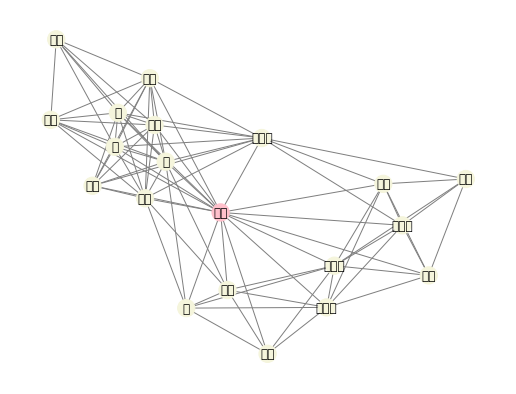

In [60]:
## 한글 시각화
# matplotlib 폰트설정
plt.rc('font', family='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf') # For MacOS
fontprop = fm.FontProperties(fname='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf', size=18)


## 노드의 degree에 따라 color 다르게 설정하기
color_map = []
for node in G:
    if G.degree(node) >= 15:   # 중요한 노드 (degree가 15 이상)
        color_map.append('pink') 
    else: 
        color_map.append('beige')    

plt.figure(figsize=(9, 7))

pos = nx.spring_layout(G)  # spring layout 사용
nx.draw_networkx(G, pos, node_color=color_map, edge_color='grey')#, font_family=font_name)

plt.axis('off') # turn off axis 
plt.show()

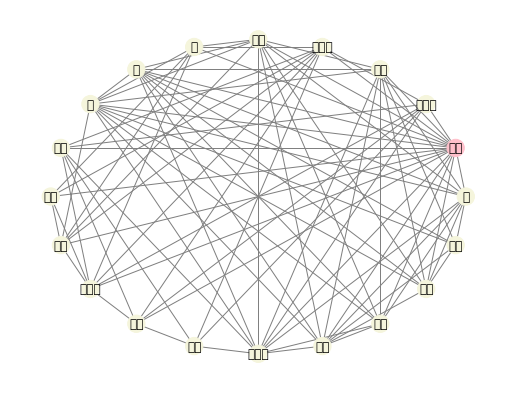

In [31]:
plt.figure(figsize=(9, 7))

pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_color=color_map, edge_color='grey', font_family=font_name) 

plt.axis('off')
plt.show()

g = nx.complete_graph(4)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir("LR")
Image(d.create_png(), width=600)